In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, accuracy_score

In [41]:
def list_all_files(directory, tags=[]):
    csv_files = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            if file.lower().endswith('.csv'):
                full_path = os.path.join(root, file)
                tags_count = 0
                for tag in tags:
                    if tag.lower() in full_path.lower():
                        tags_count += 1
                if tags_count == len(tags):
                    csv_files.append(full_path)
    return sorted(csv_files)

def get_models(paths):
    return [path.split('/')[-2] for path in paths]

def load_csv_data(csv_files):
    """Load multiple CSV files into a list of DataFrames."""
    return [pd.read_csv(file) for file in csv_files]

def plot_accuracy_bar(df_list, labels):
    """Plot overall accuracy as a bar plot for multiple experiments."""
    accuracies = []

    for df in df_list:
        correct = (df['pred'] == df['true']).sum()
        total = len(df)
        accuracy = correct / total
        accuracies.append(accuracy)

    plt.figure(figsize=(8, 5))
    plt.bar(labels, accuracies, color='skyblue')
    plt.ylabel('Accuracy')
    plt.title('Overall Accuracy for Multiple Experiments')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

def plot_confusion_matrices(df_list, labels):
    """Plot confusion matrices for multiple experiments."""
    for df, label in zip(df_list, labels):
        cm = confusion_matrix(df['true'], df['pred'])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap='Blues')
        plt.title(f'Confusion Matrix - {label}')
        plt.show()

def compute_classification_metrics(df_list, labels):
    """Compute accuracy, precision, recall, and F1-score for each model and return as DataFrame."""
    metrics = []

    for df, label in zip(df_list, labels):
        precision = precision_score(df['true'], df['pred'], zero_division=0)
        recall = recall_score(df['true'], df['pred'], zero_division=0)
        f1 = f1_score(df['true'], df['pred'], zero_division=0)
        accuracy = accuracy_score(df['true'], df['pred'])

        metrics.append({
            'Model': label,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    metrics_df = pd.DataFrame(metrics)
    return metrics_df

def plot_subplots(df_list, labels, metrics=('train_loss', 'val_accuracy'), figsize=(14, 5)):
    """Plot multiple CSVs with separate subplots for each metric."""
    fig, axes = plt.subplots(1, 2, figsize=figsize)

    for df, label in zip(df_list, labels):
        axes[0].plot(df[metrics[0]], label=label, marker='o')
        axes[1].plot(df[metrics[1]], label=label, marker='x')

    axes[0].set_title('Training Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].grid(True)

    axes[1].set_title('Validation Accuracy')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Accuracy')
    axes[1].grid(True)

    for ax in axes:
        ax.legend()

    plt.suptitle('Comparison of Multiple Experiments')
    plt.tight_layout()
    plt.show()

Train Metrics

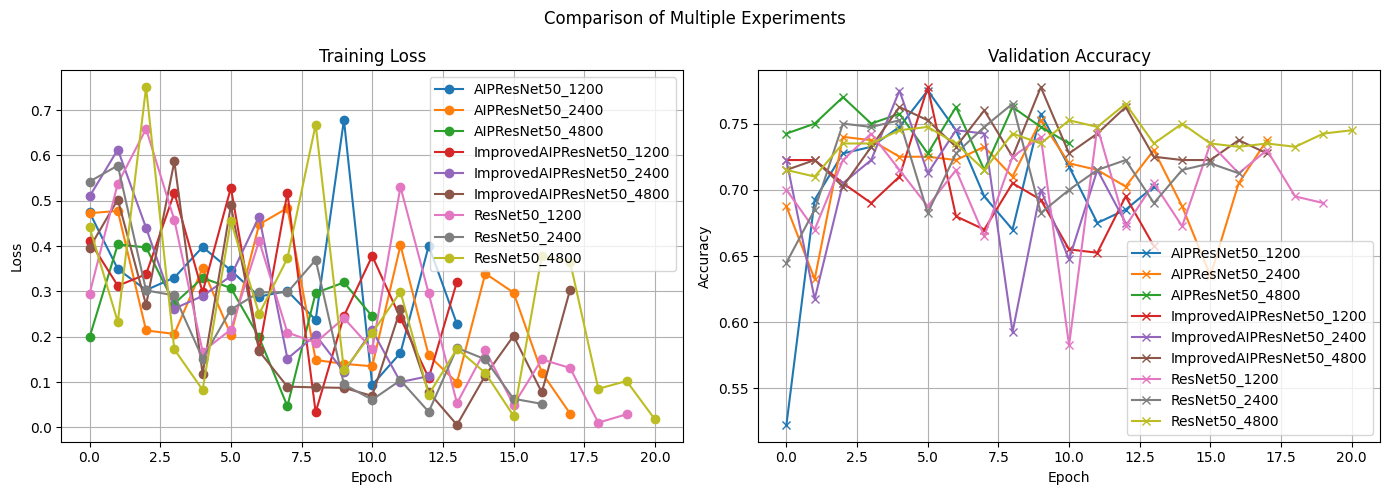

In [42]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["wcs", "animal-classifier", "metrics"])
labels = get_models(csv_files)
df_list = load_csv_data(csv_files)
plot_subplots(df_list, labels)


Test metrics

In [43]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["wcs", "animal-classifier", "eval_results"])
labels = get_models(csv_files)

# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.7500,0.676580,0.933333,0.784483
1,AIPResNet50_2400,0.6750,0.607973,0.938462,0.737903
2,AIPResNet50_4800,0.7200,0.637874,0.984615,0.774194
3,ImprovedAIPResNet50_1200,0.7950,0.730612,0.917949,0.813636
4,ImprovedAIPResNet50_2400,0.7550,0.677656,0.948718,0.790598
5,ImprovedAIPResNet50_4800,0.8175,0.752066,0.933333,0.832952
6,ResNet50_1200,0.7600,0.705394,0.871795,0.779817
7,ResNet50_2400,0.7700,0.685921,0.974359,0.805085
8,ResNet50_4800,0.7750,0.712551,0.902564,0.796380


In [44]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["caltech", "animal-classifier", "eval_results"])
labels = get_models(csv_files)

# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.6250,0.568389,0.958974,0.713740
1,AIPResNet50_2400,0.8500,0.899408,0.779487,0.835165
2,AIPResNet50_4800,0.8375,0.777778,0.933333,0.848485
3,ImprovedAIPResNet50_1200,0.6375,0.573964,0.994872,0.727955
4,ImprovedAIPResNet50_2400,0.7425,0.681102,0.887179,0.770601
5,ImprovedAIPResNet50_4800,0.6325,0.571429,0.984615,0.723164
6,ResNet50_1200,0.6975,0.630282,0.917949,0.747390
7,ResNet50_2400,0.8225,0.816327,0.820513,0.818414
8,ResNet50_4800,0.7575,0.672535,0.979487,0.797495


In [45]:
csv_files = list_all_files("/data/luiz/dataset/EcoAIP", ["serengeti", "animal-classifier", "eval_results"])
labels = get_models(csv_files)

# Load all CSVs
df_list = load_csv_data(csv_files)

# Plot overall accuracy
# plot_accuracy_bar(df_list, labels)

# Plot confusion matrices
# plot_confusion_matrices(df_list, labels)

metrics_df = compute_classification_metrics(df_list, labels)
metrics_df

,Model,Accuracy,Precision,Recall,F1 Score
0,AIPResNet50_1200,0.8450,0.818182,0.876923,0.846535
1,AIPResNet50_2400,0.8750,0.896175,0.841026,0.867725
2,AIPResNet50_4800,0.8900,0.868293,0.912821,0.890000
3,ImprovedAIPResNet50_1200,0.8900,0.899471,0.871795,0.885417
4,ImprovedAIPResNet50_2400,0.8650,0.861538,0.861538,0.861538
5,ImprovedAIPResNet50_4800,0.8825,0.902174,0.851282,0.875989
6,ResNet50_1200,0.8425,0.826733,0.856410,0.841310
7,ResNet50_2400,0.8475,0.835000,0.856410,0.845570
8,ResNet50_4800,0.8650,0.869110,0.851282,0.860104
